# 1. SETTING UP 

## 1.1 IMPORTING LIBRARY

In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import warnings
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, Normalizer

warnings.filterwarnings('ignore')
%matplotlib inline

## 1.2 IMPORT DATASET

In [3]:
c01_train = pd.read_csv("Data/C01/train C01.csv")
c02_train = pd.read_csv("Data/C02/train C02.csv")
c03_train = pd.read_csv("Data/C03/train C03.csv")
c04_train = pd.read_csv("Data/C04/train C04.csv")
c05_train = pd.read_csv("Data/C05/train C05.csv")
c06_train = pd.read_csv("Data/C06/train C06.csv")
c07_train = pd.read_csv("Data/C07/train C07.csv")
c08_train = pd.read_csv("Data/C08/train C08.csv")
c09_train = pd.read_csv("Data/C09/train C09.csv")
c10_train = pd.read_csv("Data/C10/train C10.csv")

c01_test = pd.read_csv("Data/C01/test C01.csv")
c02_test = pd.read_csv("Data/C02/test C02.csv")
c03_test = pd.read_csv("Data/C03/test C03.csv")
c04_test = pd.read_csv("Data/C04/test C04.csv")
c05_test = pd.read_csv("Data/C05/test C05.csv")
c06_test = pd.read_csv("Data/C06/test C06.csv")
c07_test = pd.read_csv("Data/C07/test C07.csv")
c08_test = pd.read_csv("Data/C08/test C08.csv")
c09_test = pd.read_csv("Data/C09/test C09.csv")
c10_test = pd.read_csv("Data/C10/test C10.csv")

train_codes = [c01_train,c02_train,c03_train,c04_train,c05_train,c06_train,c07_train,c08_train,c09_train,c10_train]
test_codes = [c01_test,c02_test,c03_test,c04_test,c05_test,c06_test,c07_test,c08_test,c09_test,c10_test]

## 1.3 ENVIRONTMENT SETUP

In [4]:
warnings.filterwarnings('ignore')
SEED = 42
TARGET = "economic_day_status"

In [5]:
c01_train.columns.to_list()

['country_code',
 'region',
 'income_group',
 'trade_balance_status',
 'political_stability',
 'economic_sector_dominant',
 'currency_type',
 'policy_framework',
 'season',
 'crisis_event',
 'governance_quality',
 'climate_impact_level',
 'trade_bloc',
 'financial_access',
 'migration_trend',
 'date',
 'year',
 'quarter',
 'gdp_per_capita',
 'inflation_rate',
 'unemployment_rate',
 'interest_rate',
 'exchange_rate',
 'exports_usd',
 'imports_usd',
 'debt_gdp_ratio',
 'investment_pct_gdp',
 'consumption_pct_gdp',
 'population_million',
 'urbanization_pct',
 'internet_penetration',
 'energy_consumption_mwh',
 'renewable_energy_pct',
 'income_inequality_gini',
 'education_index',
 'healthcare_index',
 'poverty_rate',
 'fdi_inflows_usd',
 'business_confidence_index',
 'manufacturing_pmi',
 'economic_day_status']

# 2. DATA CLEANING

## 2.1 DATA UNDERSTANDING

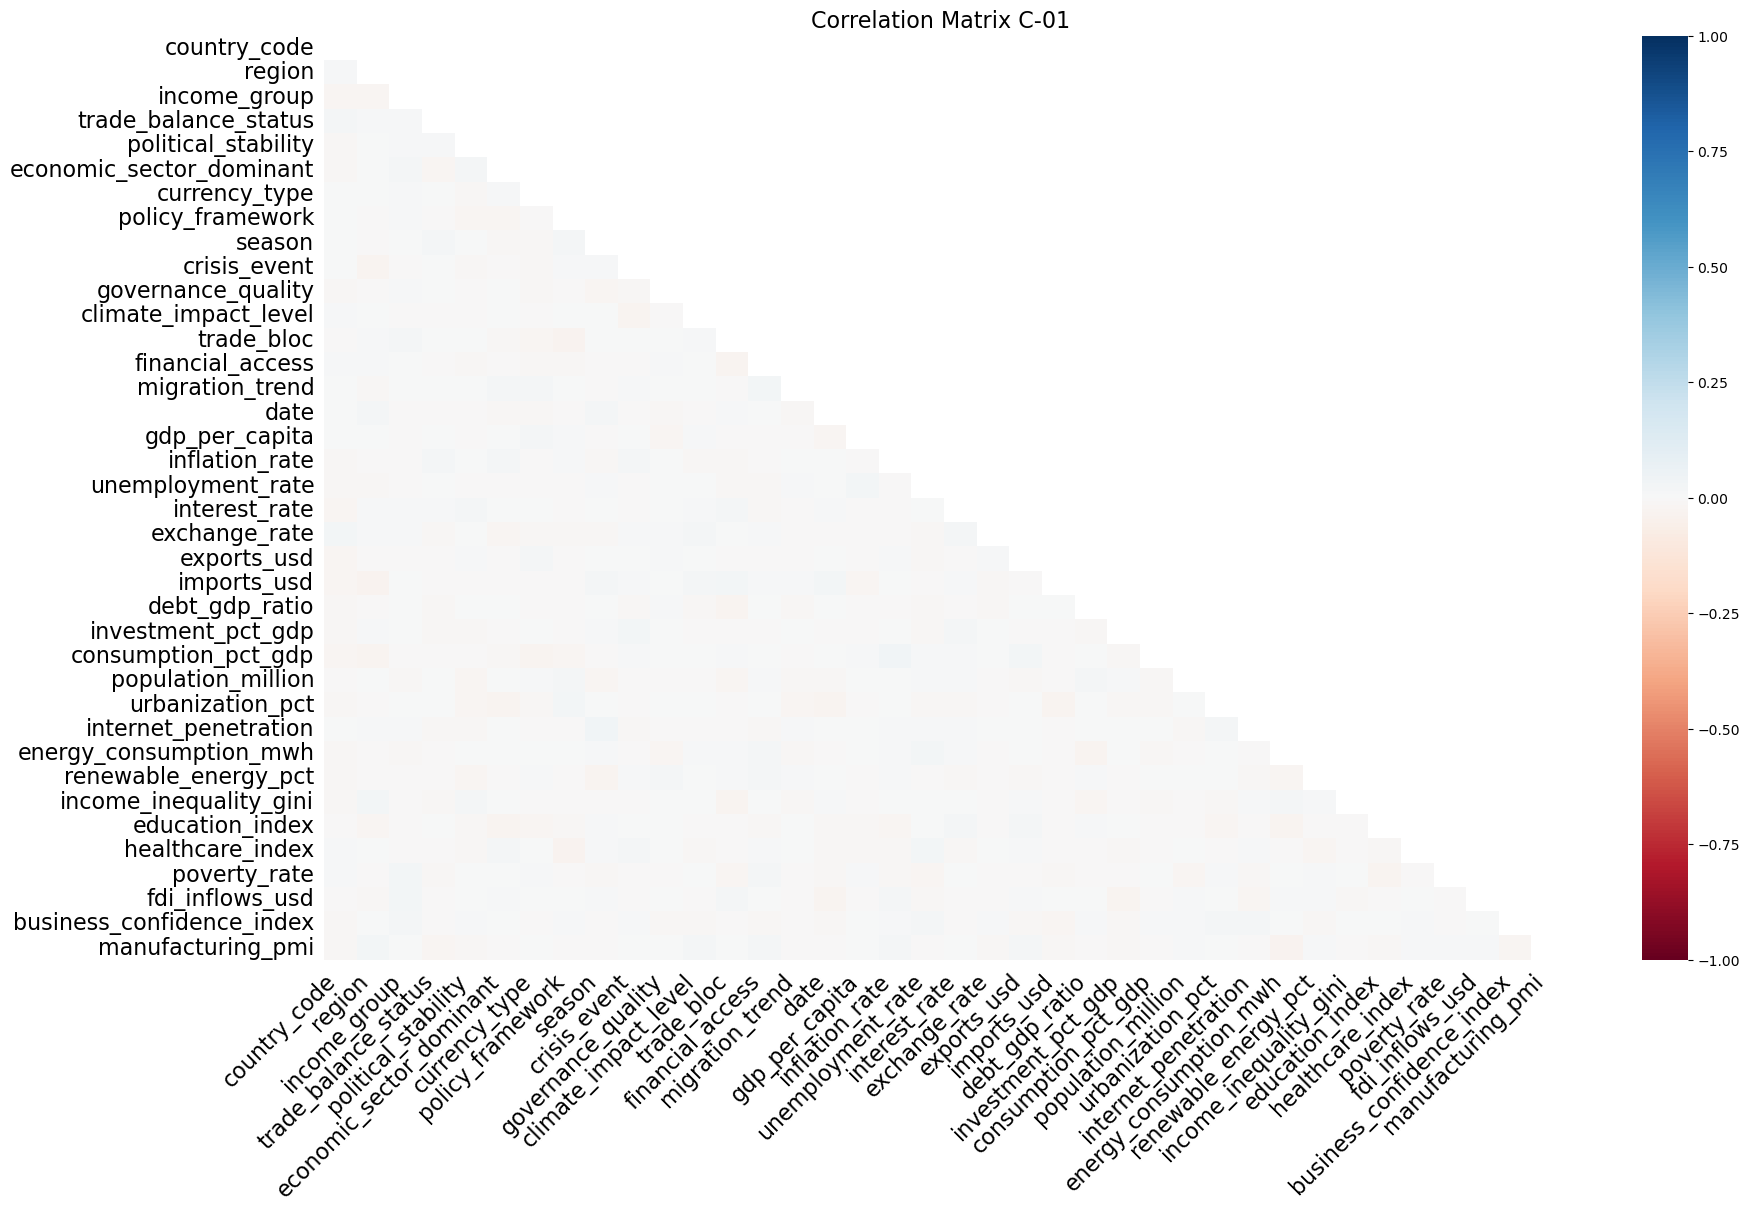

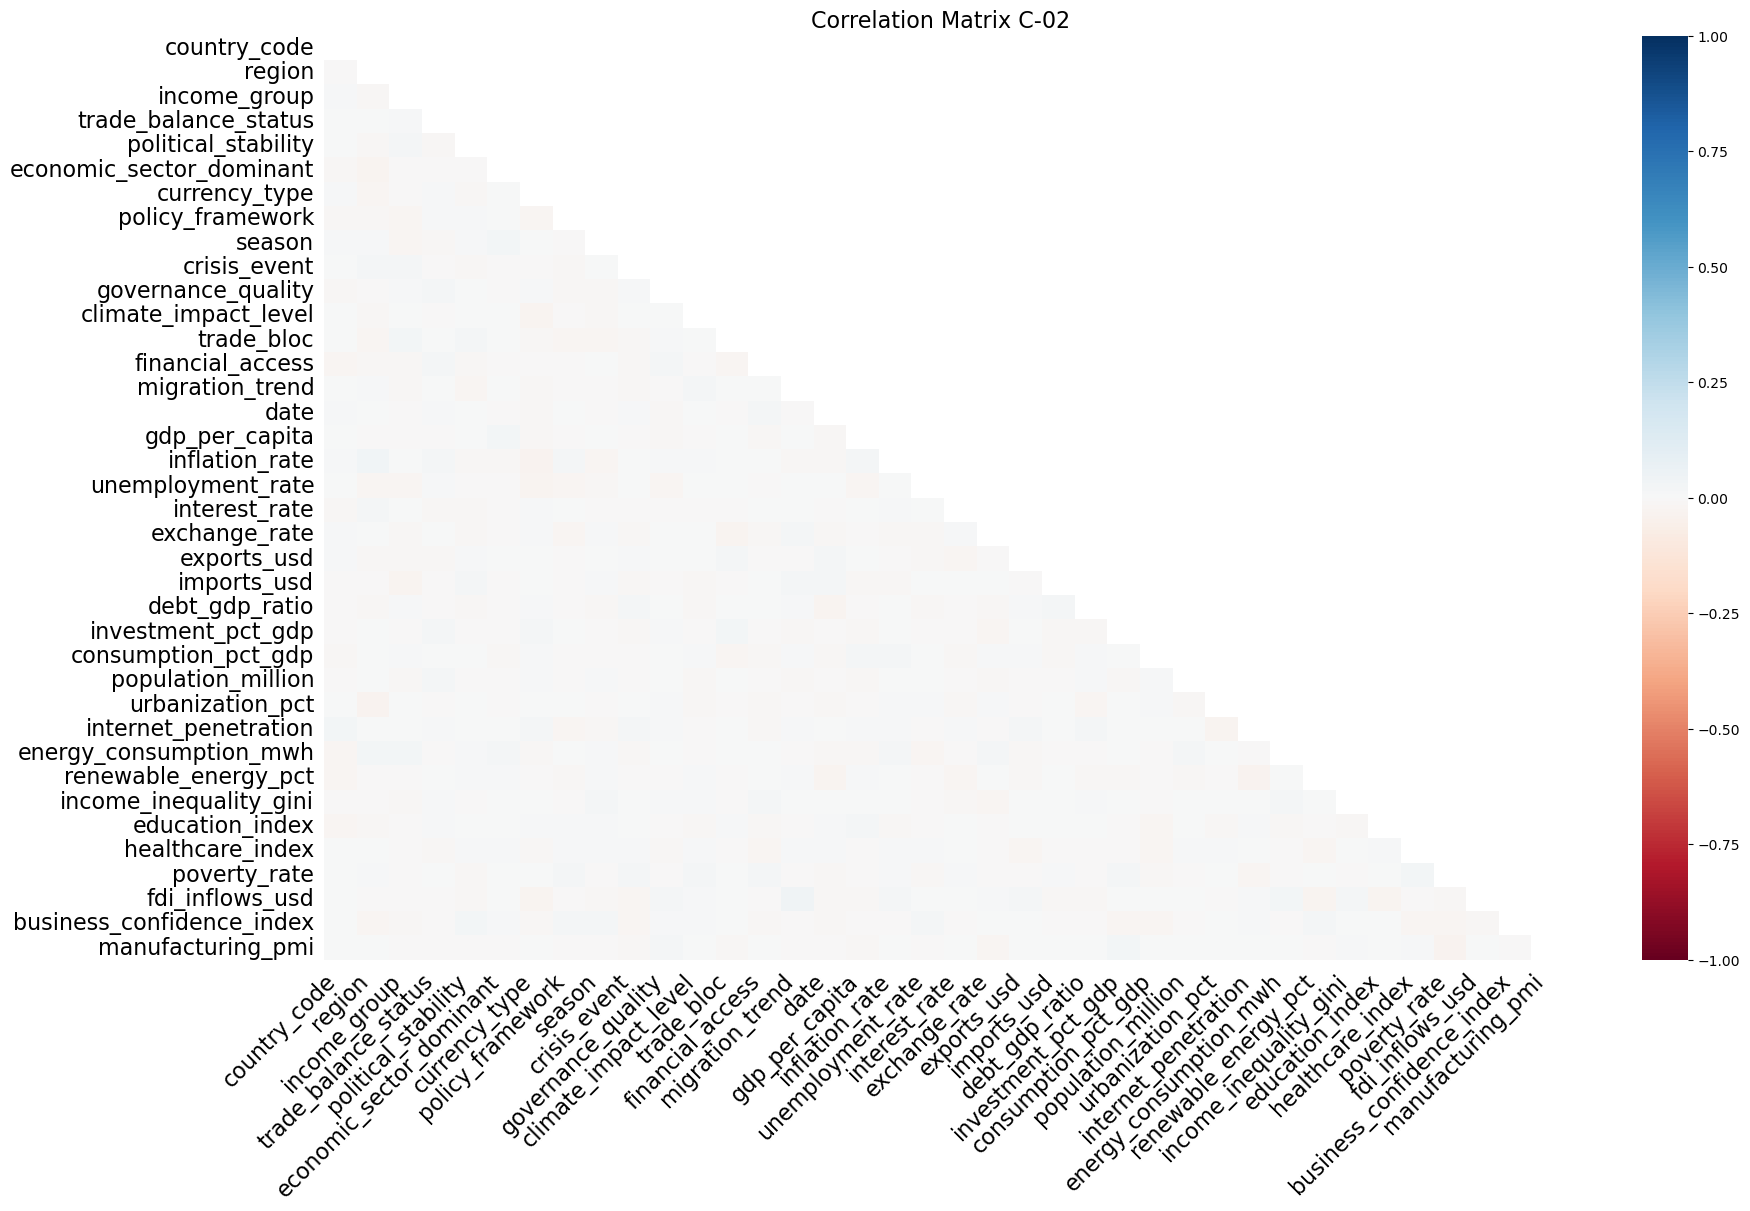

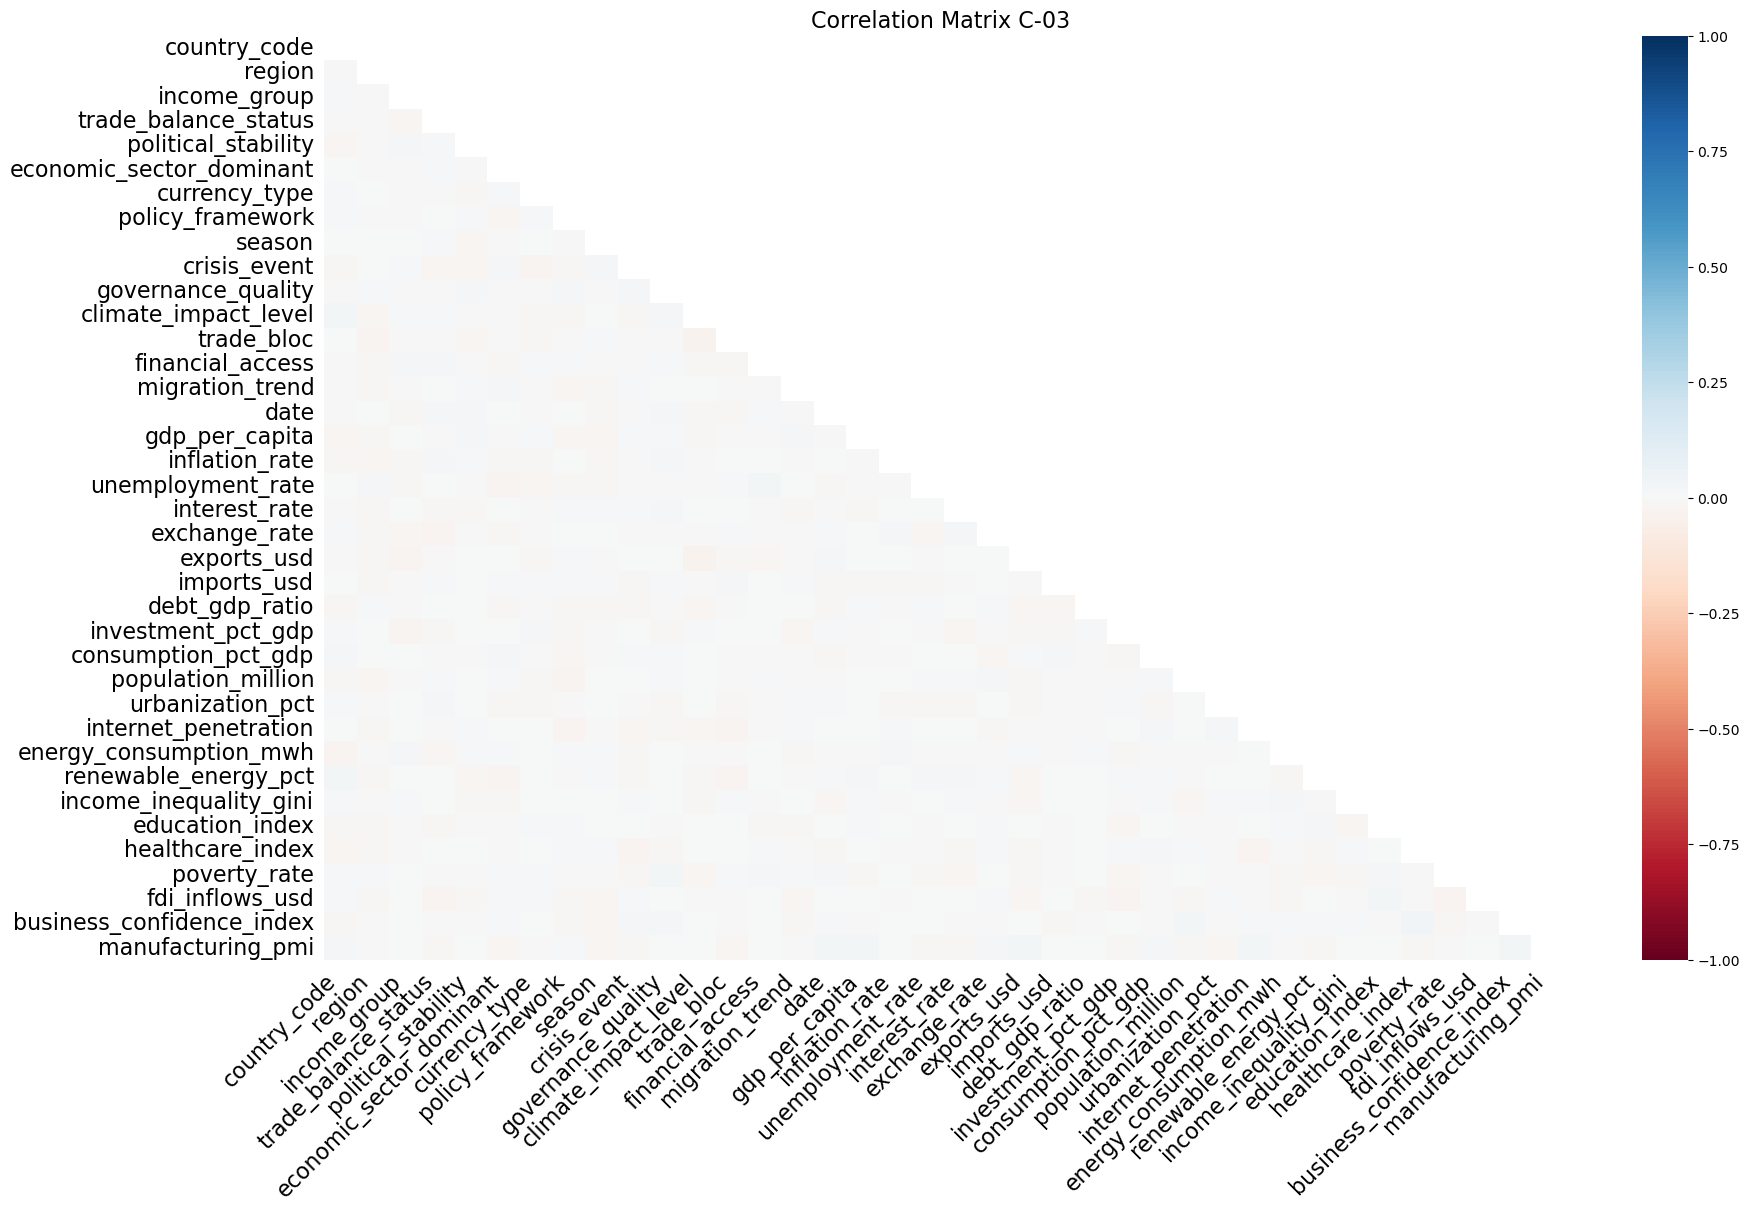

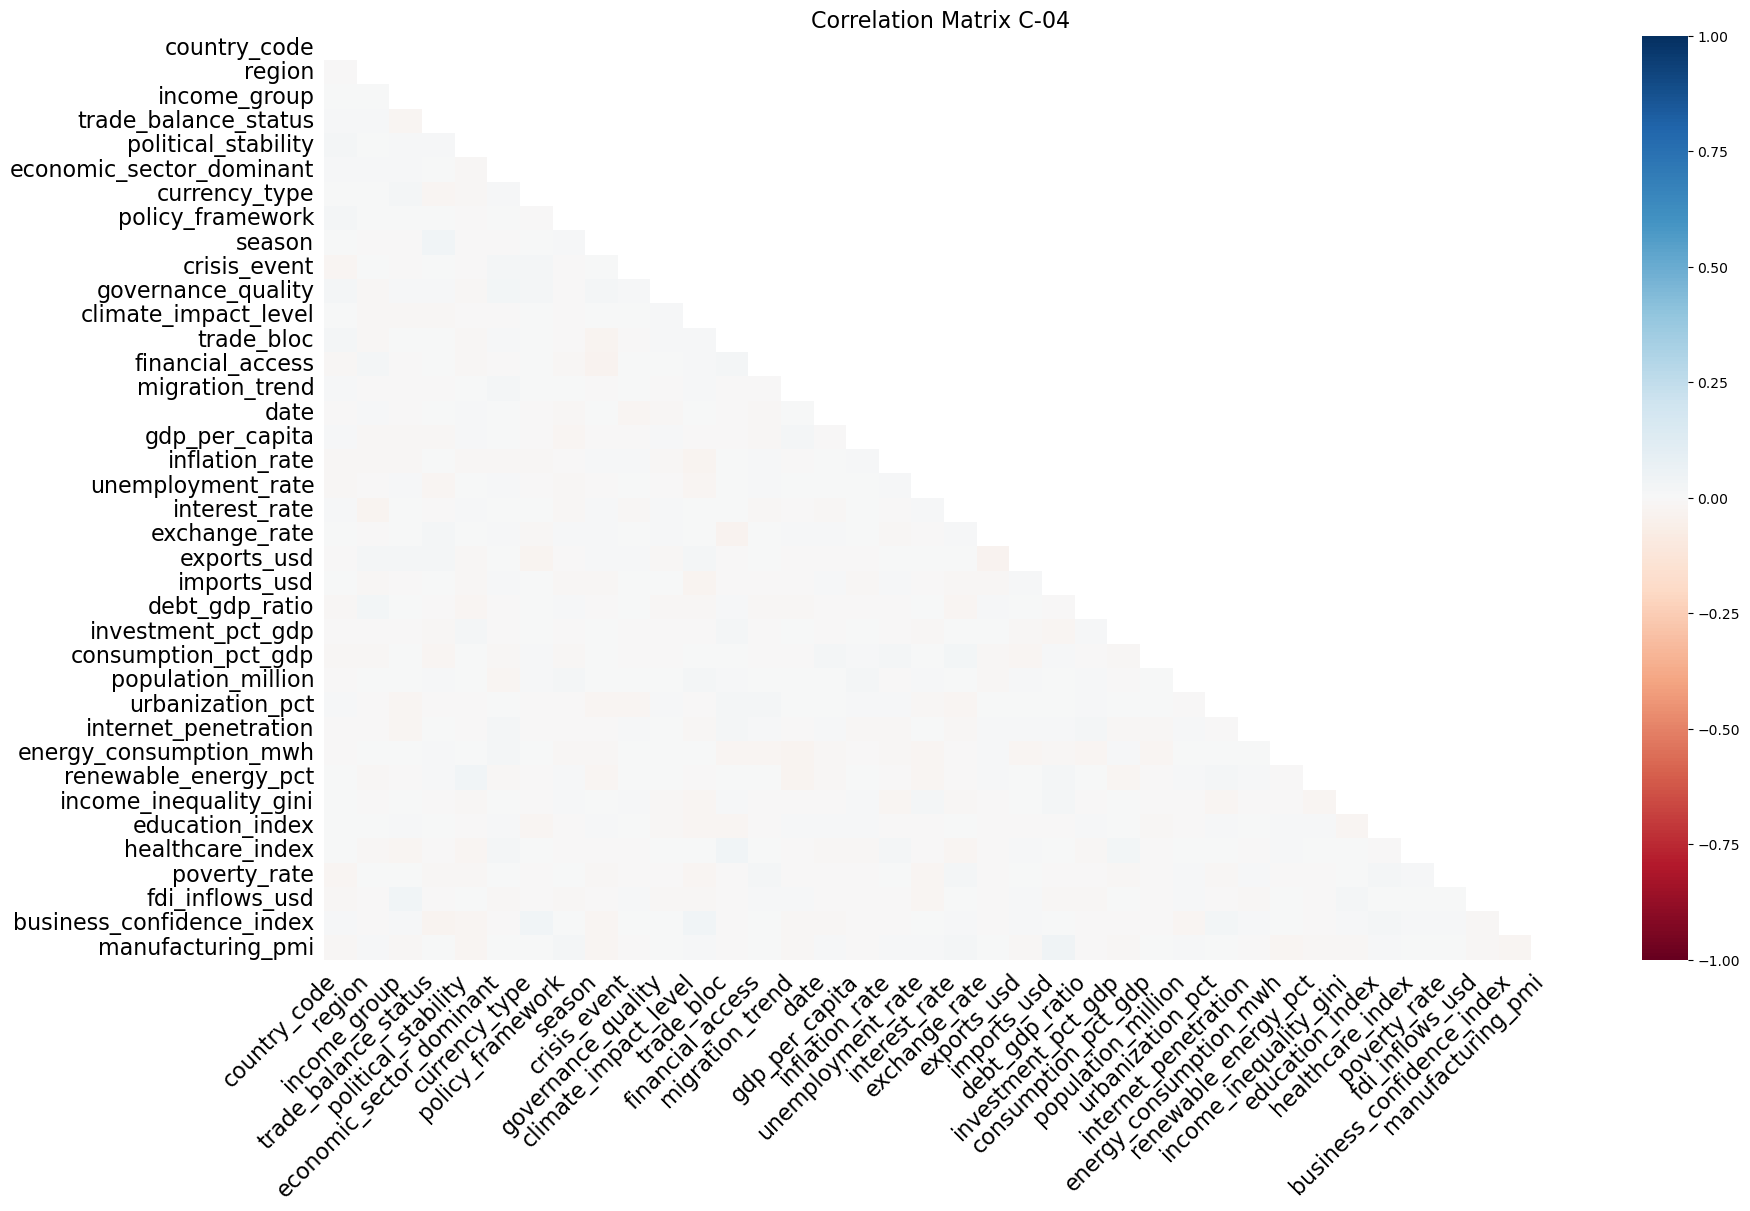

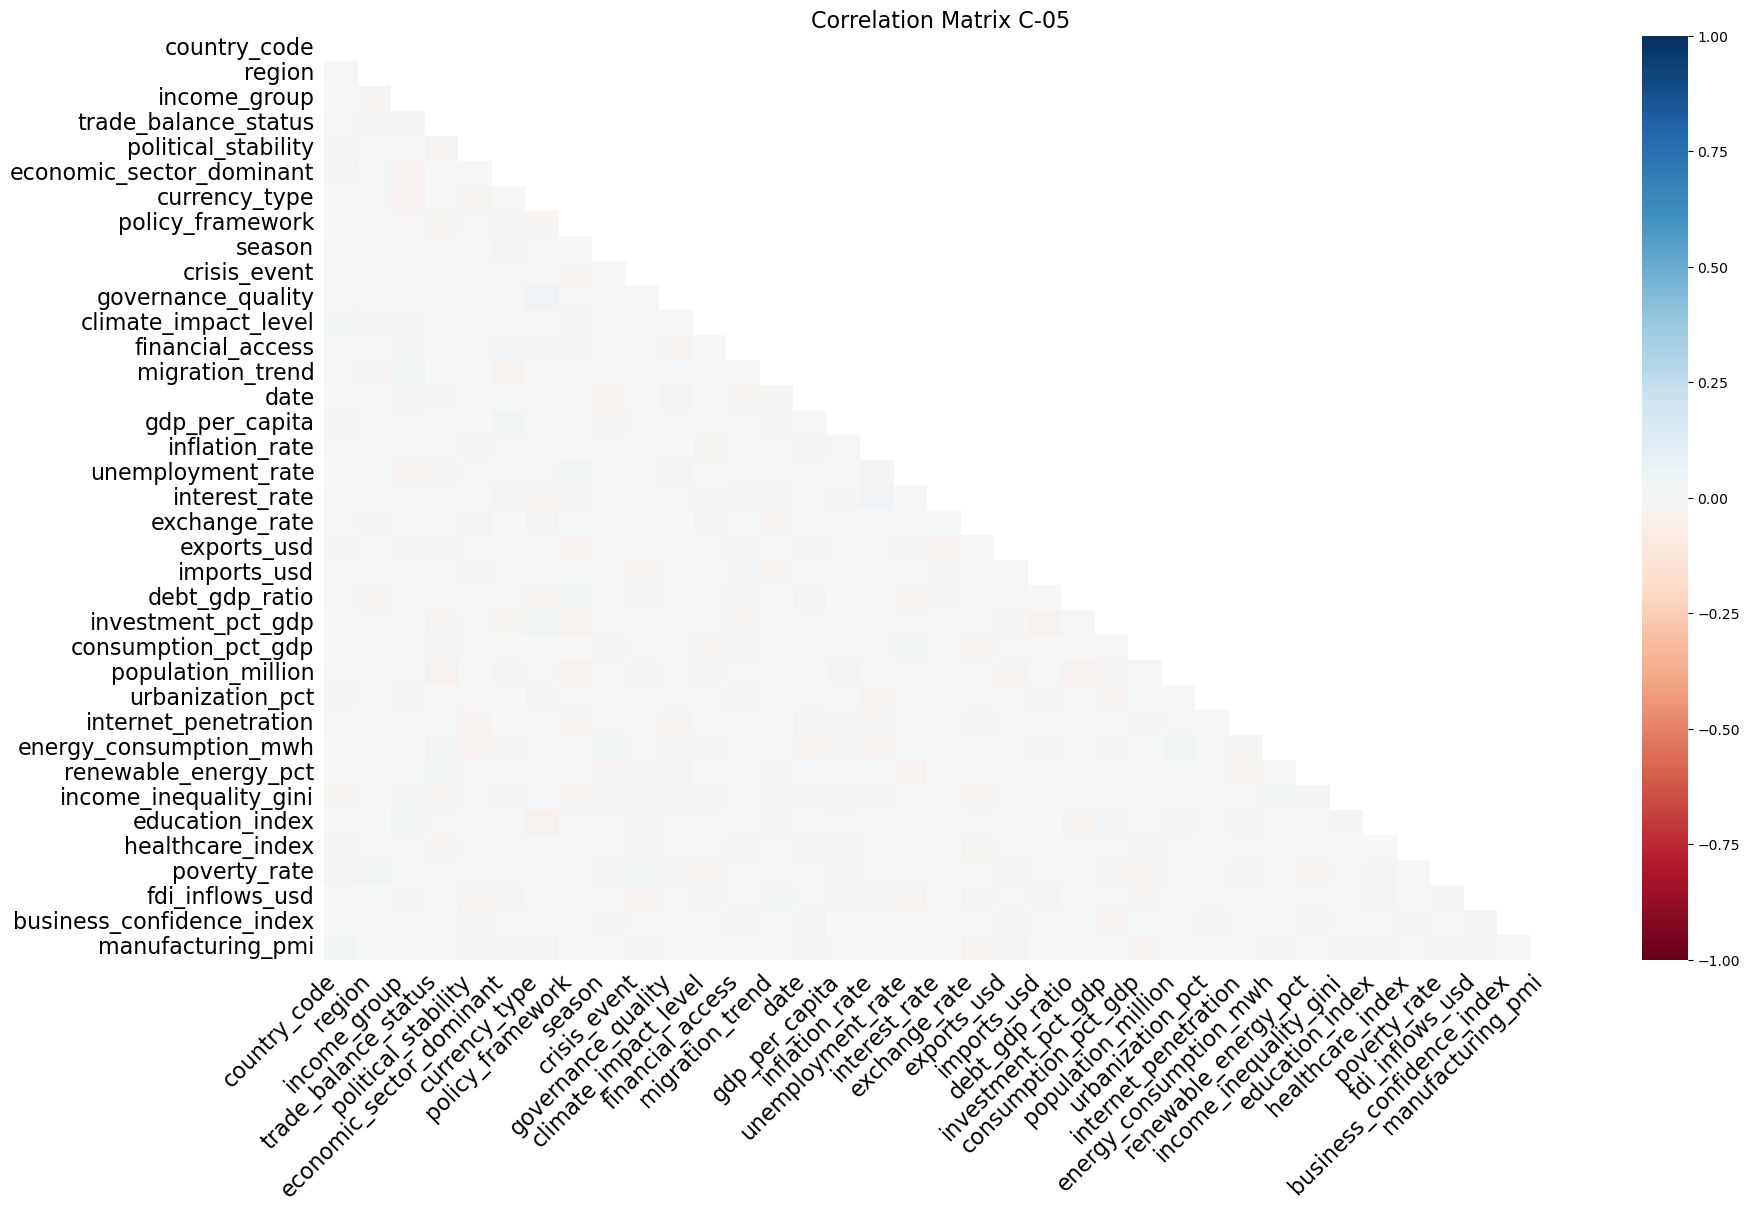

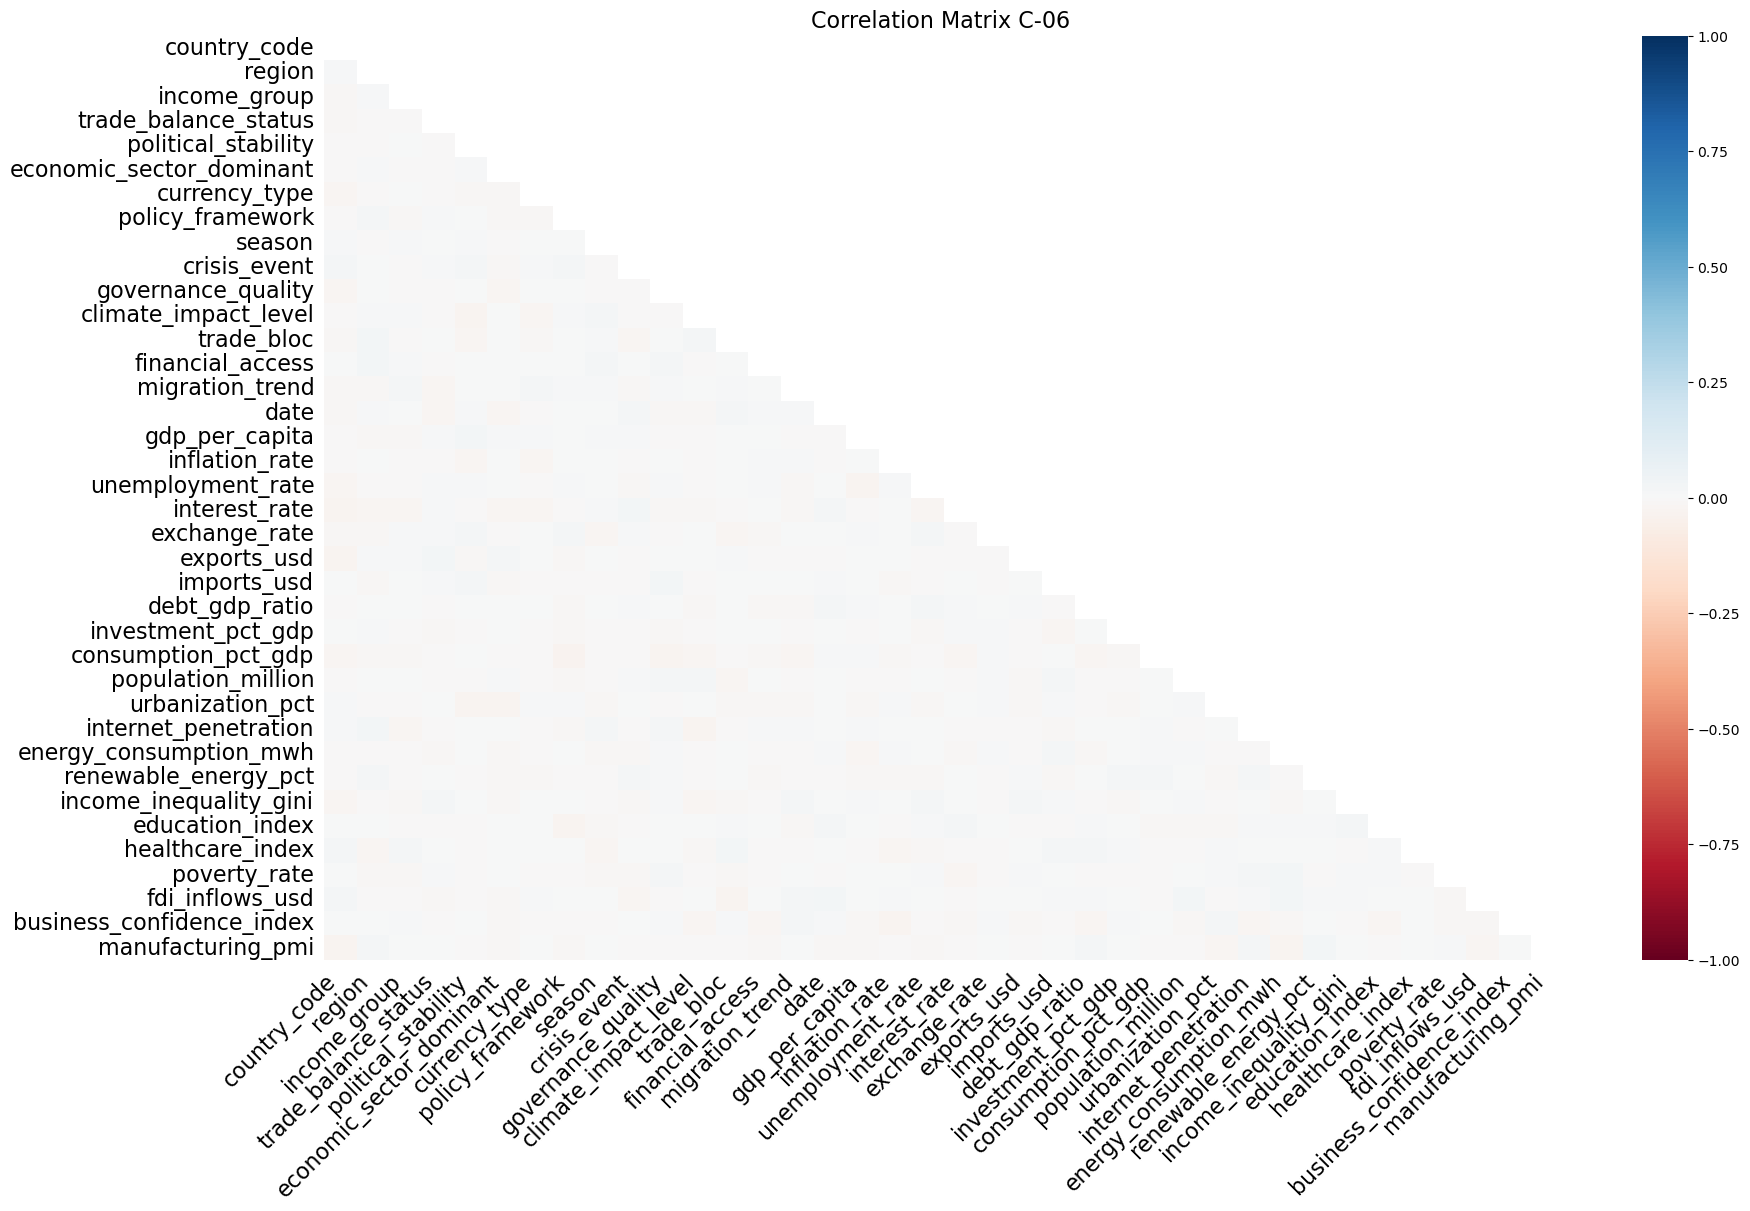

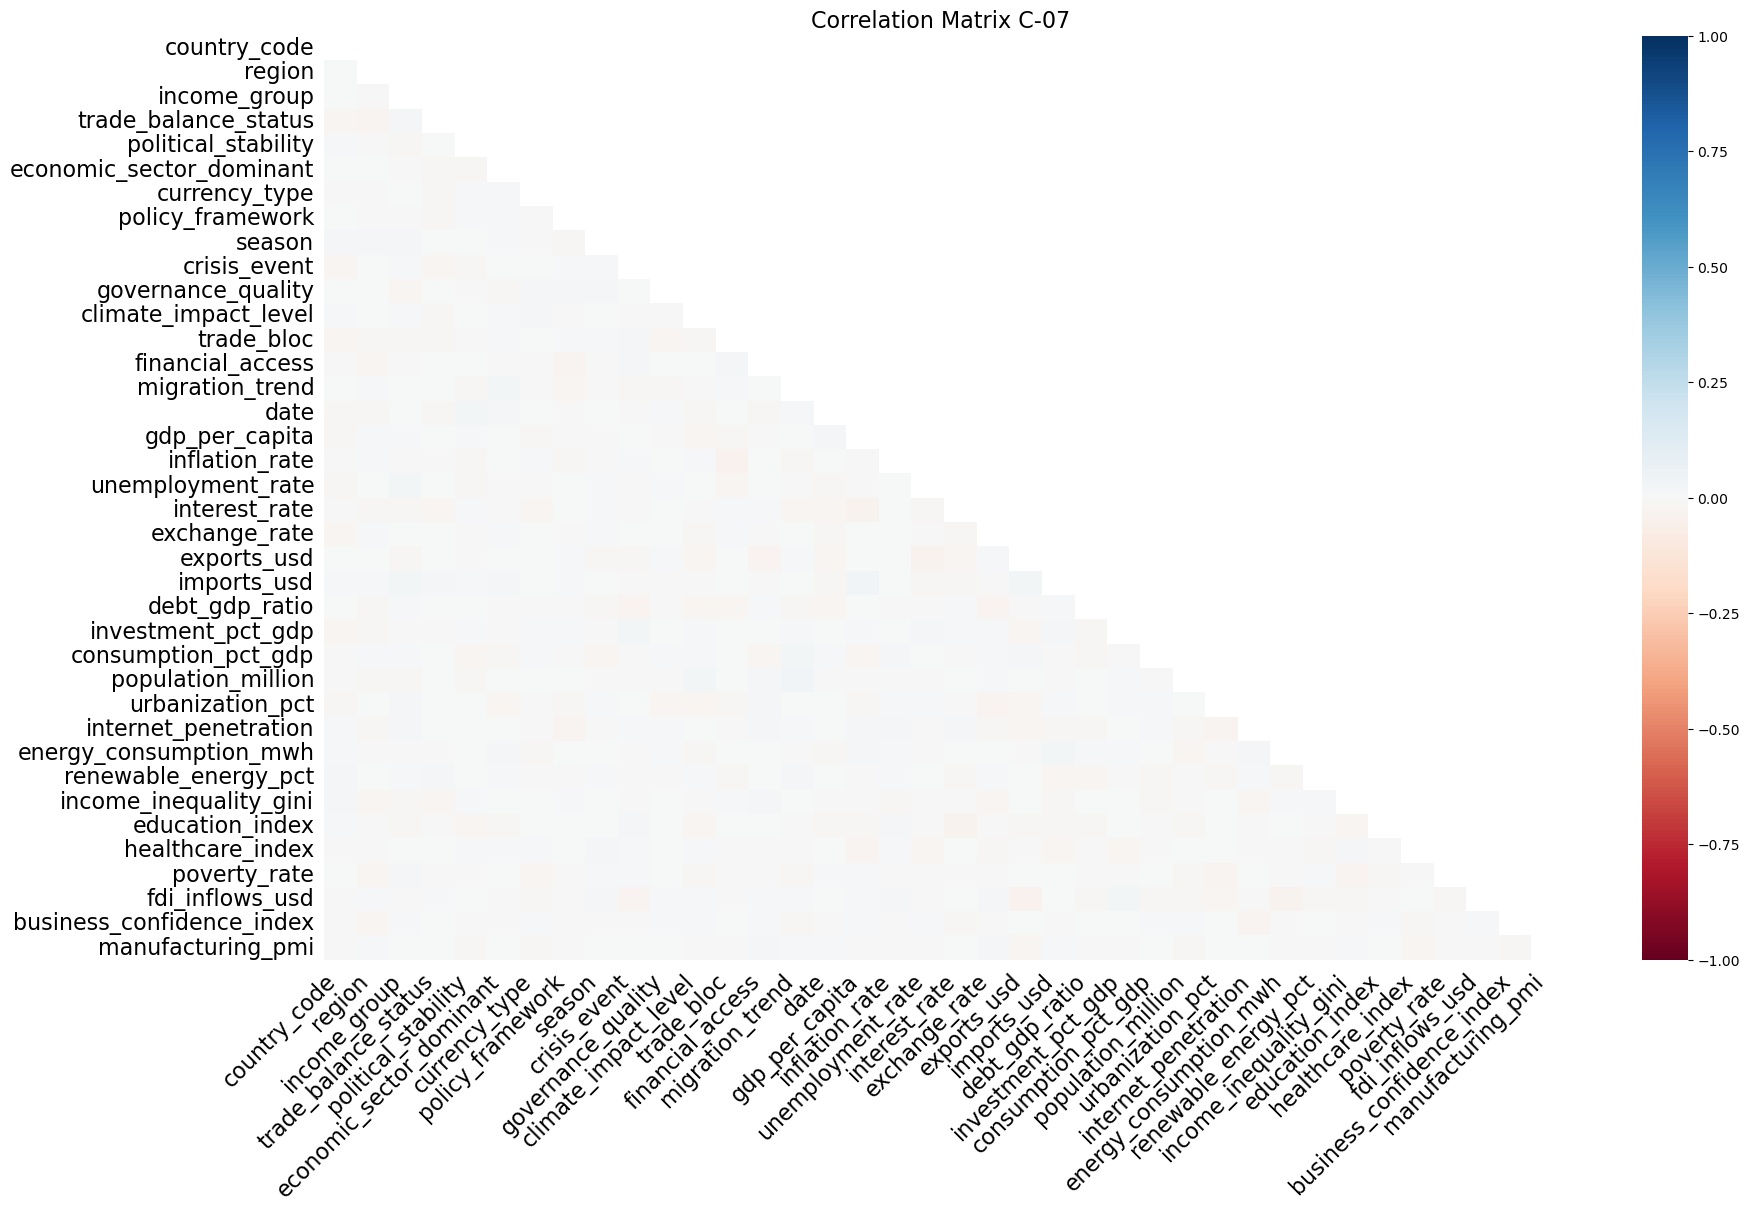

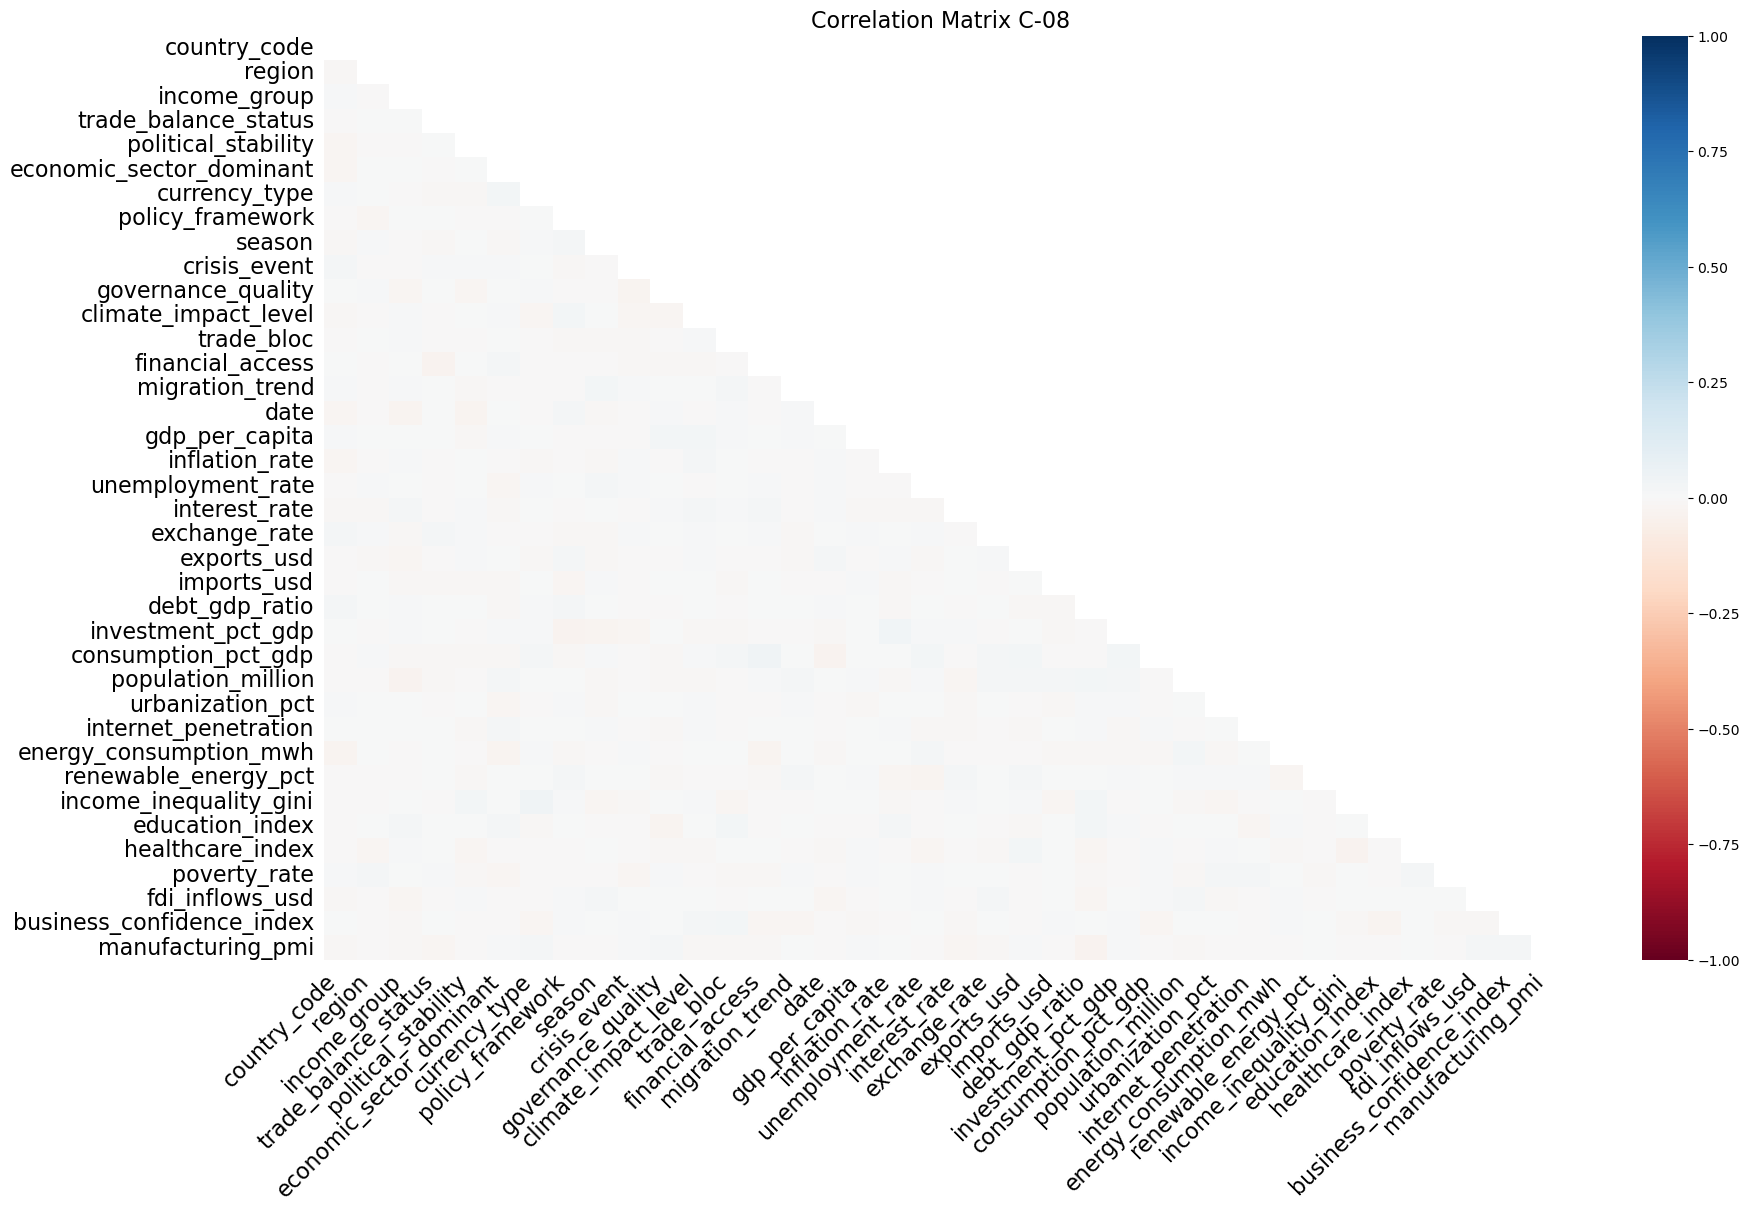

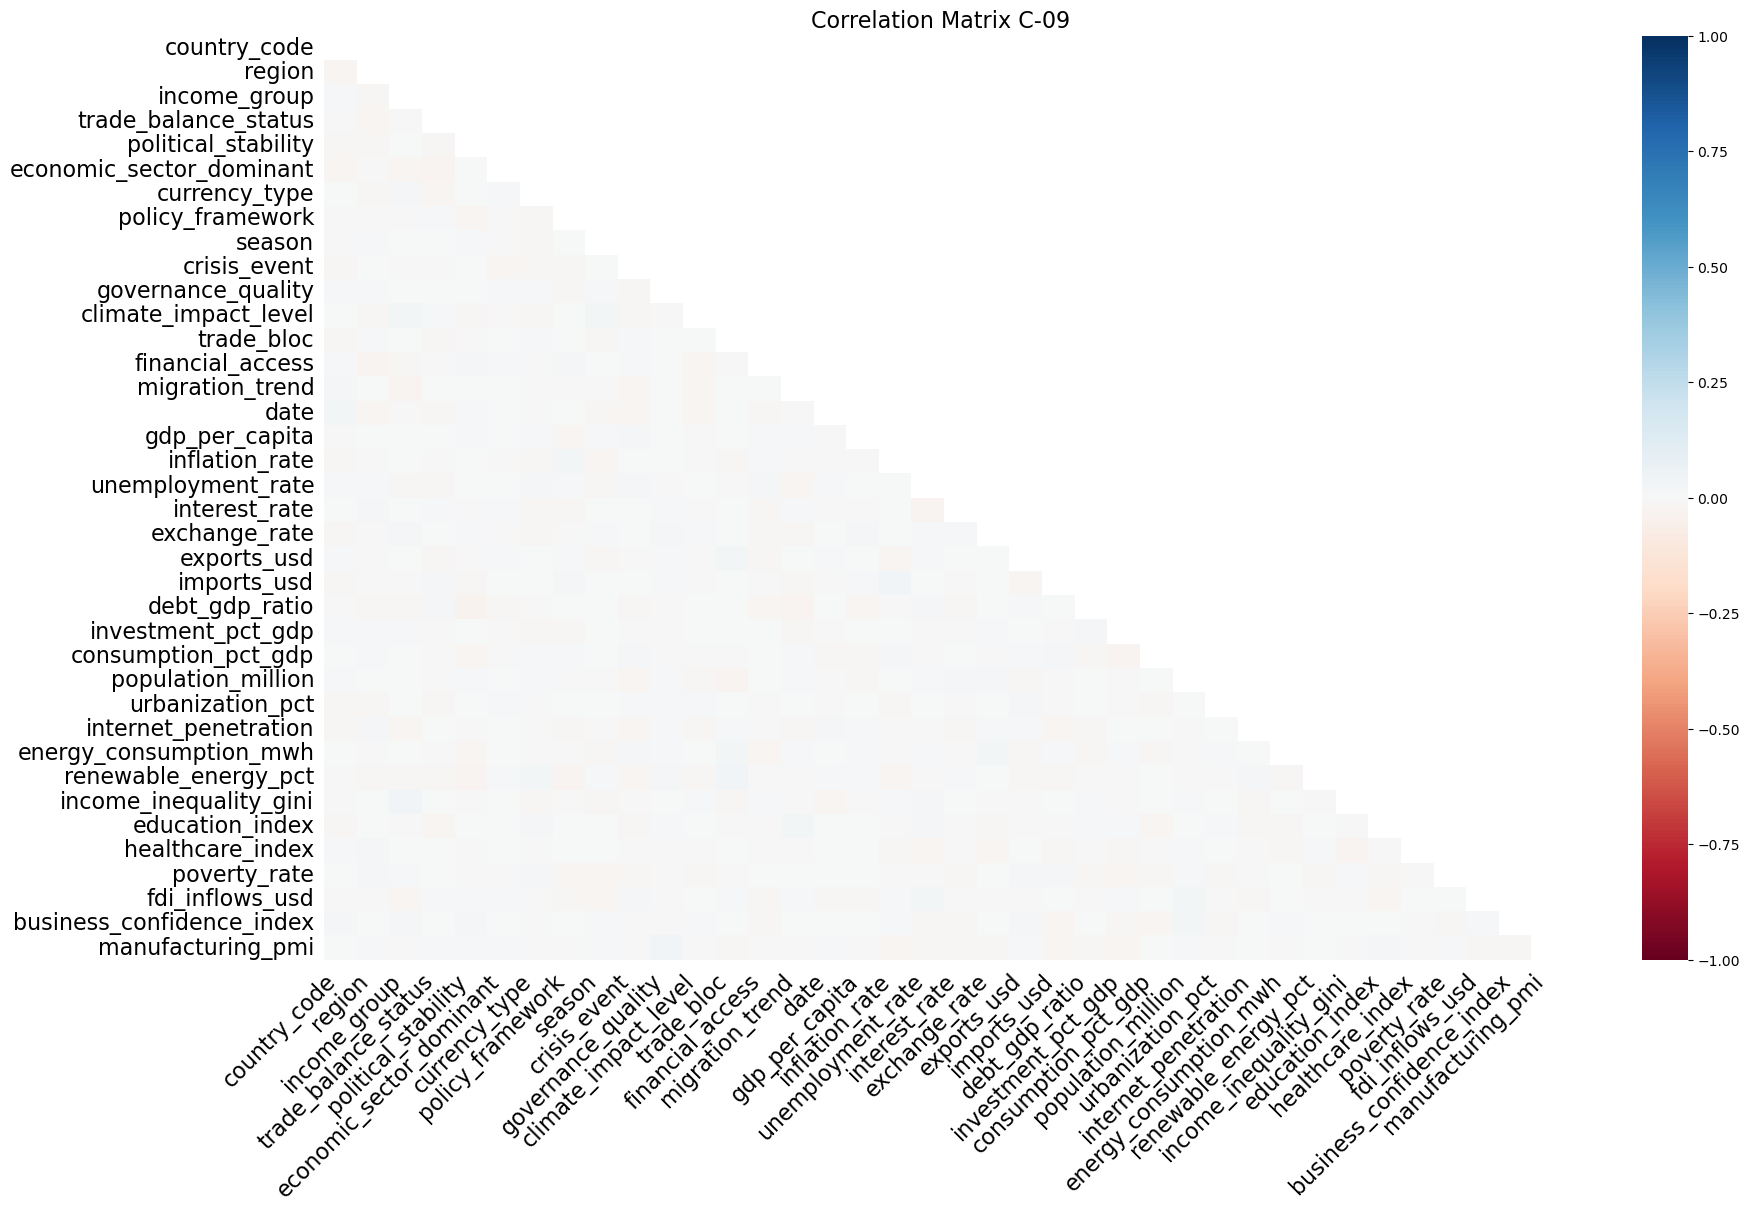

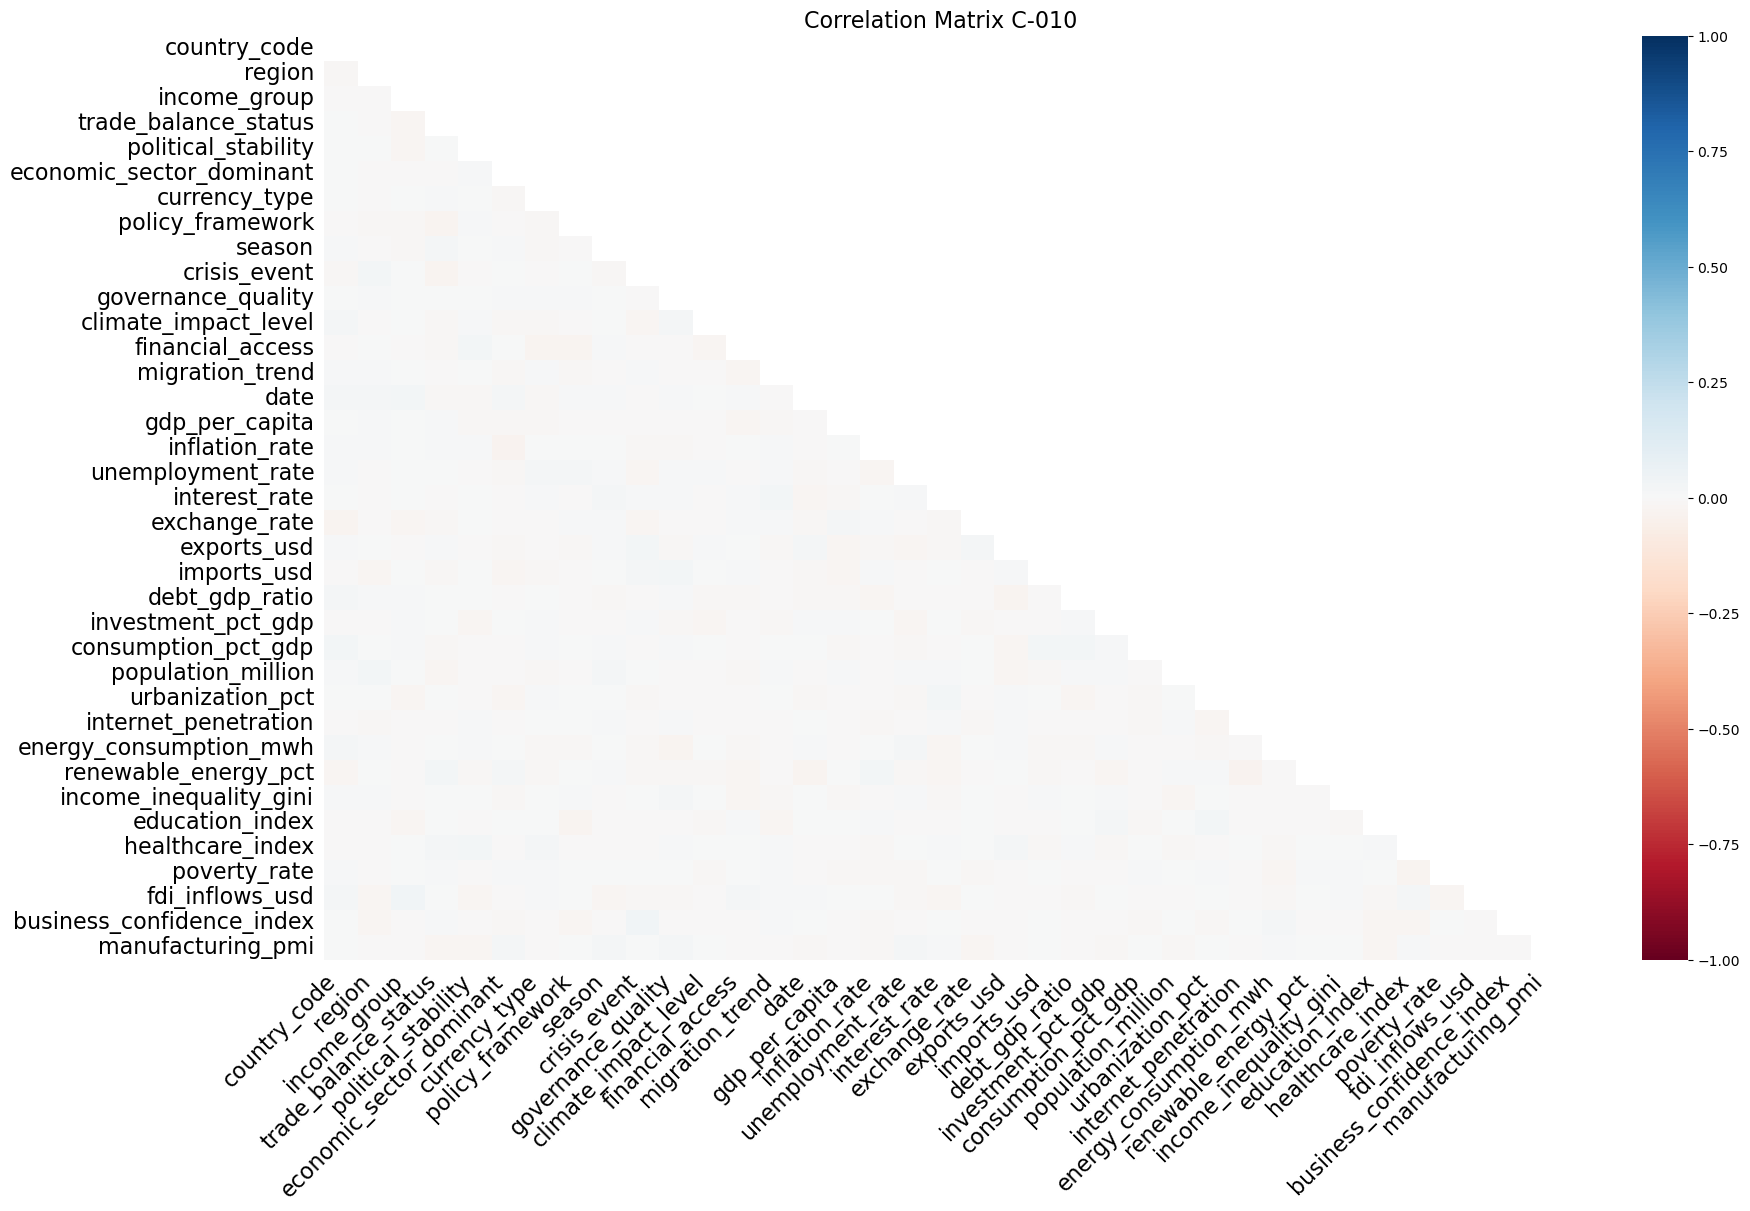

In [6]:
for i, code in enumerate(train_codes):
    country_code = (f"0{i+1}" if i < 10 else i)
    ax = msno.heatmap(code)
    ax.set_title(f"Correlation Matrix C-{country_code} ", fontsize=16)

Berdasarkan hasil dari correlation matrix diatas dapat disimpulkan apabila, data saling independen atau Missing Completely At Random (MCAR) yang mana, terbaik untuk diimpute menggunakan KNN Imputer

In [7]:
# Feature yang akan diimpute dengan modus
mode_impute_cols = ["country_code", "region", "income_group", "political_stability", "economic_sector_dominant", "currency_type", "governance_quality", "trade_bloc"]

# Feature yang akan diimpute dengan bfill dan ffill
bf_impute_cols = ["trade_balance_status", "policy_framework", "financial_access", "migration_trend", "climate_impact_level"]

# Numeric Feature yang akan diimpute dengan KNN
KNN_impute_cols = [
    "gdp_per_capita",
    "inflation_rate",
    "unemployment_rate",
    "interest_rate",
    "exchange_rate",
    "exports_usd",
    "imports_usd",
    "debt_gdp_ratio",
    "investment_pct_gdp",
    "consumption_pct_gdp",
    "population_million",
    "urbanization_pct",
    "internet_penetration",
    "energy_consumption_mwh",
    "renewable_energy_pct",
    "income_inequality_gini",
    "education_index",
    "healthcare_index",
    "poverty_rate",
    "fdi_inflows_usd",
    "business_confidence_index",
    "manufacturing_pmi"
] 

## 2.2 DATA CLEANING

In [8]:
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5)

def impute(codes: list):
    for code in codes:
        # Imputing dengan Mode
        code[mode_impute_cols] = code[mode_impute_cols].fillna(code[mode_impute_cols].mode().iloc[0])
        
        # Imputing dengan bfill dan ffill
        code[bf_impute_cols] = code[bf_impute_cols].bfill()
        code[bf_impute_cols] = code[bf_impute_cols].ffill()
        code['trade_bloc'] = code['trade_bloc'].fillna("No Bloc")
        
        # Convert object to date
        code["date"] = pd.to_datetime(code["date"])
        dates = code["date"].values

        # Impute missing Date
        if pd.isna(dates[0]):
            valid_idx = np.where(pd.notna(dates))[0]
            if valid_idx.size > 0:
                first_valid = valid_idx[0]
                dates[0] = dates[first_valid] - np.timedelta64(first_valid, "D")
            else:
                dates[0] = pd.Timestamp.today().normalize()

        for i in range(1, len(dates)):
            if pd.isna(dates[i]):
                dates[i] = dates[i-1] + np.timedelta64(1, "D")

        code["date"] = dates
        
        code[KNN_impute_cols] = imputer.fit_transform(code[KNN_impute_cols])
        code[KNN_impute_cols] = scaler.fit_transform(code[KNN_impute_cols])
        
# Apply
impute(train_codes)
impute(test_codes)


In [9]:
for code in test_codes:
    code["date"] = pd.to_datetime(code["date"])
    code["id"] = code["country_code"] + "_" + code["date"].dt.strftime("%Y%m%d")
    code.set_index("id", inplace=True, drop=False)

## 2.3 DATA CONCATING

In [10]:
# Gabungkan data
df_train = pd.concat(train_codes, ignore_index=True)
df_test = pd.concat(test_codes, ignore_index=True)

## 2.4 DATA EXPORTING

In [11]:
df_train.to_csv("Data/train.csv", index=False)
df_test.to_csv("Data/test.csv", index=False)